In [368]:
import pandas as pd
import numpy as np
from math import sqrt
from math import pi
from math import exp
import matplotlib.pyplot as plt

df = pd.read_csv('health_data.csv')

print(df.head())

   age  restbps  chol  category
0   26      109   243         0
1   27      106   156         0
2   28      107   225         0
3   27      105   277         0
4   30       96   221         0


In [369]:
#randomize indces, take the first 80% of the indices and last 20 percent as test
indices = np.random.permutation(df.shape[0])
train_ind, test_ind = indices[:int(0.7*df.shape[0])], indices[int(0.7*df.shape[0]):]
# print(len(train_ind), len(test_ind))

#select the data corresponding to the train and test indices and save into 2 dataframes. Reset index afterwards
train_df, test_df = df.loc[train_ind, :], df.loc[test_ind, :]
train_df, test_df = train_df.reset_index(), test_df.reset_index()

#print('Train data is : \n', train_df.head(), ' \nnumber of rows = {}'.format(train_df.shape[0]))
#print('Test data is : \n', test_df.head(), ' \nnumber of rows = {}'.format(test_df.shape[0]))

In [370]:
x_train = train_df.iloc[:,1:4]
y_train = train_df.iloc[:,4]

x_test = test_df.iloc[:,1:4]
y_test = test_df.iloc[:,4]

x_train['ones'] = 1
x_test['ones'] = 1

for col in ['age', 'restbps', 'chol']:
    x_train[col] = (x_train[col]-x_train[col].mean())/(x_train[col].std())
    x_test[col] = (x_test[col]-x_test[col].mean())/(x_test[col].std())
    
print(x_train.head())
print(y_train.head())
print(x_test.head())
print(y_test.head())

        age   restbps      chol  ones
0 -0.914425 -0.979663 -0.572850     1
1  0.505540  0.123261 -0.609164     1
2  0.505540 -0.317908 -1.135713     1
3 -1.590599 -1.255394  0.262365     1
4 -1.455365 -0.869371 -1.044928     1
0    0
1    1
2    0
3    0
4    0
Name: category, dtype: int64
        age   restbps      chol  ones
0 -1.447292 -1.072283 -0.931129     1
1  0.471540 -0.106542 -1.653439     1
2 -1.518359 -1.340544 -1.382572     1
3  1.253287  1.771288 -0.046300     1
4 -0.168070  0.483633 -0.353281     1
0    0
1    0
2    0
3    1
4    1
Name: category, dtype: int64


In [371]:
X_train = x_train.to_numpy()
X_test = x_test.to_numpy()
print(X_train.shape)
print(X_test.shape)

#print(W.shape)
Y_train = y_train.to_numpy()
Y_train = np.reshape(Y_train,(Y_train.shape[0],1))
Y_test = y_test.to_numpy()
Y_test = np.reshape(Y_test,(Y_test.shape[0],1))
print(Y_train.shape)
print(Y_test.shape)

(489, 4)
(211, 4)
(489, 1)
(211, 1)


In [372]:
def sigmoid(x):
    return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))

def predict(W,X,threshold):
    Z = sigmoid(np.matmul(X,W))
    Z[Z>threshold] = 1
    Z[Z<=threshold] = 0
    return Z

In [373]:
num_iter = 1000
rate = 0.01
W_init = np.random.random((X_train.shape[1],1))

# Cross Entropy Loss

In [374]:
def loss(W,X,Y):
    eps = 1e-14
    mean = sigmoid(np.matmul(X,W)) #assuming that the function will calc sigmoid elementwise
    #mean shape = (489,1)
    #y shape = (489,1)
    logloss = -(np.mean(np.multiply(Y,np.log(mean + eps))) + np.mean(np.multiply(1-Y,np.log(1-mean + eps))))
    return logloss

def gradient(W,X,Y):
    mean = sigmoid(np.matmul(X,W))
    return  X.T@((Y-mean)*mean*(1-mean))


def sgd(W,X,Y,X_test,Y_test,rate,num_iter):
    train_loss, test_loss =[], []
    for _ in range(0, num_iter):
        grad = gradient(W,X,Y)
        W = W + rate*grad
        train_loss.append(loss(W,X,Y))
        test_loss.append(loss(W,X_test,Y_test))
    return W, train_loss, test_loss



[[ 2.180251  ]
 [ 0.68652094]
 [ 0.33867316]
 [-0.50598777]]


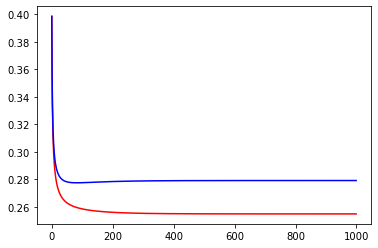

In [375]:
W = np.copy(W_init)
W = W*0.001
W, train_loss, test_loss = sgd(W,X_train,Y_train,X_test,Y_test,rate,num_iter)

print(W)

plt.plot(train_loss, 'r')
plt.plot(test_loss, 'b')
plt.show()

# Cross Entropy Loss with L2 Regularisation

In [376]:
def gradientL2(W,X,Y,lam):
    mean = sigmoid(np.matmul(X,W))
    return X.T@((Y-mean)*mean*(1-mean)) - 2*lam*W

def lossL2(W,X,Y,lam):
    eps = 1e-14
    mean = sigmoid(np.matmul(X,W))
    logloss = -(np.mean(np.multiply(Y,np.log(mean + eps))) + np.mean(np.multiply(1-Y,np.log(1-mean + eps)))) + lam*np.mean(np.multiply(W,W))
    return logloss

def sgdL2(W,X,Y,X_test,Y_test,rate,num_iter,lam):
    train_loss, test_loss =[], []
    for _ in range(0, num_iter):
        grad = gradientL2(W,X,Y,lam)
        W = W + rate*grad
        train_loss.append(lossL2(W,X,Y,lam))
        test_loss.append(lossL2(W,X_test,Y_test,lam))
    return W, train_loss, test_loss                                                                                                                                                                                                                

[[ 2.17649522]
 [ 0.68711224]
 [ 0.3388249 ]
 [-0.50545746]]


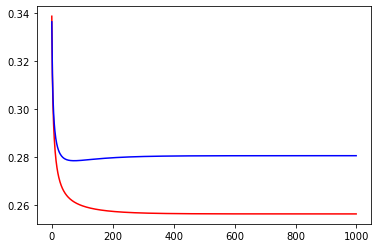

In [377]:
W2 = np.random.random((X_train.shape[1],1))
lam2 = 0.001
W2, train_loss_L2, test_loss_L2 = sgdL2(W2,X_train,Y_train,X_test,Y_test,rate,num_iter,lam2)
print(W2)
plt.plot(train_loss_L2, 'r')
plt.plot(test_loss_L2, 'b')
plt.show()

<ipython-input-378-18b19ef44741>:10: RuntimeWarning: invalid value encountered in long_scalars
  P = (TP)/(TP+FP)


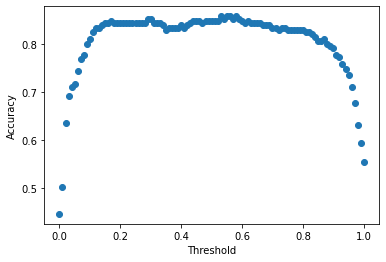

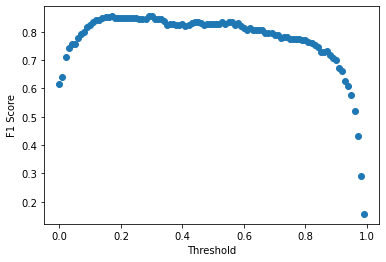

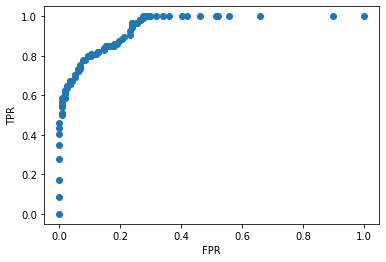

0.9476723040552828


In [378]:
def performance_metrics(y_pred_test, y_test):
    '''gives the TPR, FPR, acc, precision, recall and F1 score by comparing the 2 input arrays'''
    #for precision, recall, class 1 will be positive class (ie the person ahs a health condition) 
    #and 0 as negative class (no health condition)
    TP = np.logical_and(y_pred_test==y_test,y_pred_test == 1).sum()
    FP = np.logical_and(y_pred_test!=y_test,y_pred_test == 1).sum()
    TN = np.logical_and(y_pred_test==y_test,y_pred_test == 0).sum()
    FN = np.logical_and(y_pred_test!=y_test,y_pred_test == 0).sum()
    ACC = (TP+TN)/(TP+TN+FP+FN)
    P = (TP)/(TP+FP)
    R = (TP)/(TP+FN)
    F1 = 2*P*R/(P+R)
    TPR = R
    FPR = FP/(FP+TN)
    
    # return {'accuracy':ACC, 'precision':P, 'recall':R, 'F1':F1, 'TPR':TPR, 'FPR': FPR}
    return [ACC, P, R, F1, TPR, FPR]

intervals = 101

threshold = np.linspace(0,1,intervals)
Y_pred = []
acc = []
p = []
r = []
f1 = []
tpr = []
fpr = []

W00 = np.random.random((X_train.shape[1],1))
W00, l1, l2 = sgd(W00,X_train,Y_train,X_test,Y_test,rate,num_iter)
    

for i in range(intervals):
    Y_pred.append(predict(W00,X_test,threshold[i]))

for i in range(intervals):
    pfm = performance_metrics(Y_pred[i],Y_test)
    acc.append(pfm[0])
    p.append(pfm[1])
    r.append(pfm[2])
    f1.append(pfm[3])
    tpr.append(pfm[4])
    fpr.append(pfm[5])

plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.scatter(threshold,acc)

plt.show()

plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.scatter(threshold,f1)

plt.show()

plt.ylabel('TPR')
plt.xlabel('FPR')
plt.scatter(fpr,tpr)

plt.show()

fpr = np.sort(fpr)
tpr = np.sort(tpr)
auc = np.trapz(tpr,fpr)

print(auc)

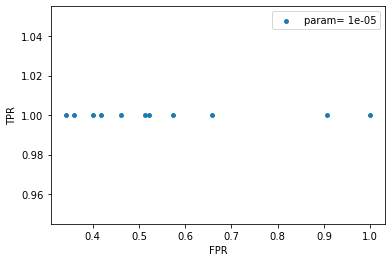

In [379]:

intervals = 11


Y_pred = []
acc = []
p = []
r = []
f1 = []
tpr = []
fpr = []
for i in range(intervals):
    W01 = np.random.random((X_train.shape[1],1))
    W01, l1, l2 = sgdL2(W01,X_train,Y_train,X_test,Y_test,rate,num_iter,0.001*(rate+1))
    Y_pred.append(predict(W01,X_test,threshold[i]))
    pfm = performance_metrics(Y_pred[i],Y_test)
    acc.append(pfm[0])
    p.append(pfm[1])
    r.append(pfm[2])
    f1.append(pfm[3])
    tpr.append(pfm[4])
    fpr.append(pfm[5])
plt.scatter(fpr,tpr,label='param= ' + str(rate/1000),s=15)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.show()